In [30]:
import os
import re
import matplotlib.pyplot as plt

**Part 1 - This function returns the count of all the bases at ith position with QS>=30**

In [31]:
def func1(fname, th, n): #the main function that returns the list containing the fraction of reads 
    infile = open(fname)
    c = 0
    str_list = []
    temp = []
    for line in infile:
        c += 1
        if c%4 == 0:
            str_list.append(line.strip()) #this adds the Q score lines to a list
    for elem in str_list:
        temp.append(list(str(elem)))
    temp2 = changeOrd(temp, th, n) #this line checks and converts the characters into ASCII value and adds the reads greater than a threshold value at a position to a list  
    final = frac(temp2, temp) #this line gives the fraction of reads 
    return final

In [32]:
def changeOrd(mylist, th, n): #this function converts the characters into ASCII value and checks and append the characters greater than the threshold value to the list
    ascii_vals = []
    for i in range(n):
        dummy = []
        for elem in mylist:
            if (ord(elem[i])-33) >= th:
                dummy.append(ord(elem[i])-33)
        ascii_vals.append(dummy)
    return ascii_vals

In [33]:
def frac(ascii_vals, temp): #this function returns a list with the fraction of reads greater than the threshold at a position
    final_ascii = []
    for elem in ascii_vals:
        final_ascii.append(len(elem)/len(temp))
    return final_ascii

In [34]:
pX1 = func1('XI1_ATCACG_L001_R1_001.fastq', 30, 250)

In [35]:
pX2 = func1('XI1_ATCACG_L001_R2_001.fastq', 30, 250)

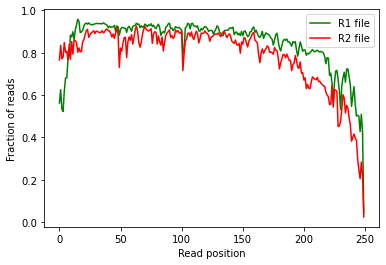

In [36]:
plt.plot(pX1, color = 'green', label = 'R1 file')
plt.plot(pX2, color = 'red', label = 'R2 file')
plt.xlabel("Read position")
plt.ylabel("Fraction of reads")
plt.legend()
plt.show()

**Part 2 - This function returns the count from 0 to k for all the reads with base QS>=30**

In [37]:
def func2(fname):
    infile = open(fname)
    c = 0
    str_list =[]
    for line in infile:
        c += 1
        if c%4 == 0:
            str_list.append(line.strip())
    return (str_list) 

In [38]:
def k_bases(str_list, k, th): #this will count the number of blocks with k bases >=30
    block = 0
    for i in str_list: #this will point to the QS string
        mylist = []
        cnt = 0
        for j in i: #this will point to the characters of the QS string
            mylist.append(ord(j)-33) #this will convert the extracted QS string into scores and add to mylist
        for base in mylist: #this points to each score of the extracted QS string 
            if base >= th:
                cnt +=1 #this counts how many bases are >=30
        if cnt == k: #this checks if the number of bases are equal to k 
            block += 1
    return block 

In [39]:
def cntBlocks(fname, n, th):
    out = func2(fname)
    pX1 = [0] * n
    pX2 = []
    for k in range(0, 251, 1):
        pX1[k] = k 
        block = k_bases(out, k, th)
        pX2.append(block)
    return pX2 

In [40]:
pX1 = cntBlocks('XI1_ATCACG_L001_R1_001.fastq', 251, 30)

In [41]:
pX2 = cntBlocks('XI1_ATCACG_L001_R2_001.fastq', 251, 30)

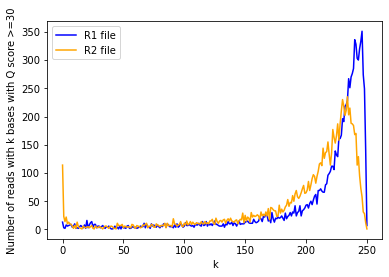

In [42]:
plt.plot(pX1, color = 'blue', label = 'R1 file')
plt.plot(pX2, color = 'orange', label = 'R2 file')
plt.xlabel("k")
plt.ylabel("Number of reads with k bases with Q score >=30")
plt.legend()
plt.show()

As seen in the graph corresponding to the first part, in the starting position more fraction of reads from R2 file are greater than the threshold quality score as compared to R2 file. In paired-end reads, R1 file has the reads from on side and in R2 is the reads from the other end. Since, R2 is sequenced after R1, the accuracy of the reads at a particular position would be more in R2 as compared to R1. R2 can be thought of as a proofread version of R1 where the nuances that were not noticed in R1, can be identified in R2.  

As seen in the graph of second part, the quality initially in R2 was better than R1. However, as the read number is increased, the quality of R2 depreciates. Since, R2 is supposed to a better quality than R1, it can be due to misreading the bases. 